In [7]:
from torchvision import datasets, transforms

train_data = datasets.MNIST(
	root="data",
	train=True,
	download=True,
	transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
	root="data",
	train=False,
	download=True,
	transform=transforms.ToTensor()
)

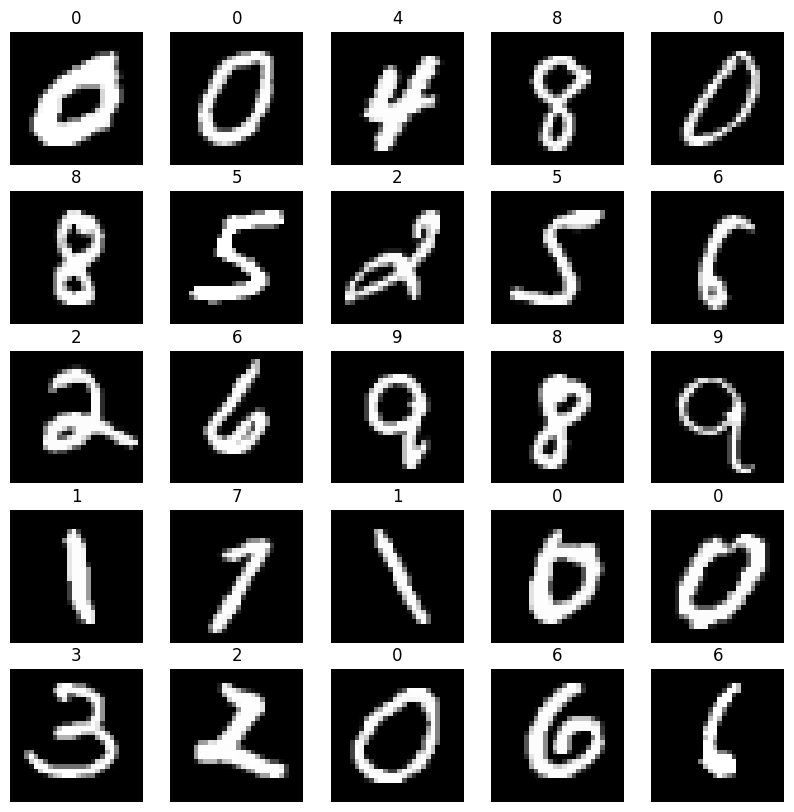

In [8]:
from matplotlib import pyplot as plt
from torch import randint

fig = plt.figure(figsize=(10, 10))
rows,cols = 5, 5
for i in range(1,26):
	rnd = randint(0,len(train_data),(1,)).item()
	img, lbl = train_data[rnd]
	img = img.squeeze()
	fig.add_subplot(rows, cols, i)
	plt.imshow(img, cmap="gray")
	plt.title(lbl)
	plt.axis(False)

In [9]:
import torch

batch_size= 32
train_loader = torch.utils.data.DataLoader(
	dataset=train_data,
	batch_size=batch_size,
	shuffle=True
)
test_loader = torch.utils.data.DataLoader(
	dataset=test_data,
	batch_size=batch_size,
	shuffle=False
)
len(train_loader), len(test_loader)

(1875, 313)

In [10]:
from torch import nn
class NumberClassifier(nn.Module):
	def __init__(self):
		super().__init__()
		self.stack = nn.Sequential(
			nn.Flatten(),
			nn.Linear(in_features=28*28, out_features=28),
			nn.ReLU(),
			nn.Linear(in_features=28, out_features=28),
			nn.ReLU(),
			nn.Linear(in_features=28, out_features=10)
		)

	def forward(self, x: torch.Tensor) -> torch.Tensor :
		return self.stack(x)

In [11]:
mdl = NumberClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
	params=mdl.parameters(),
	lr=0.01
)
def acc_fn(preds: torch.Tensor, target: torch.Tensor) -> float:
	return torch.eq(preds.argmax(dim=1),target).sum().item()/len(target)

In [12]:
epochs = 1

for epoch in range(epochs):
	for batch, (x,y) in enumerate(train_loader):
		mdl.train()

		preds = mdl(x)
		loss = loss_fn(preds, y)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()


		if batch%50==0:
			mdl.eval()
			with torch.inference_mode():
				total_acc = 0
				total_loss = 0
				for test_x, test_y in test_loader:
					test_preds = mdl(test_x)
					total_acc += acc_fn(test_preds, test_y)
					total_loss += loss_fn(test_preds, test_y)
				total_acc /= len(test_loader)/100
				total_loss /= len(test_loader)

				print(f"epoch:{epoch:<6}batch:{batch:<6}accuracy:{total_acc:.2f}{'%':<6}loss:{total_loss:.3f}")

epoch:0     batch:0     accuracy:8.07%     loss:2.304
epoch:0     batch:50    accuracy:9.89%     loss:2.292
epoch:0     batch:100   accuracy:17.34%     loss:2.276
epoch:0     batch:150   accuracy:22.44%     loss:2.253
epoch:0     batch:200   accuracy:27.54%     loss:2.225
epoch:0     batch:250   accuracy:27.07%     loss:2.190
epoch:0     batch:300   accuracy:30.31%     loss:2.145
epoch:0     batch:350   accuracy:40.04%     loss:2.088
epoch:0     batch:400   accuracy:45.34%     loss:2.018
epoch:0     batch:450   accuracy:51.70%     loss:1.931
epoch:0     batch:500   accuracy:53.78%     loss:1.829
epoch:0     batch:550   accuracy:57.29%     loss:1.719
epoch:0     batch:600   accuracy:63.02%     loss:1.605
epoch:0     batch:650   accuracy:65.91%     loss:1.492
epoch:0     batch:700   accuracy:65.44%     loss:1.373
epoch:0     batch:750   accuracy:67.56%     loss:1.265
epoch:0     batch:800   accuracy:69.09%     loss:1.173
epoch:0     batch:850   accuracy:71.54%     loss:1.089
epoch:0     